In [47]:
import numpy as np 
import matplotlib.pyplot as plt

#from skimage.draw import line_aa

class Discretizer:
    def __init__(self, landmarks, grid_size=1, world_coords=[400,500]):
        self.grid_size = grid_size
        self.world_map = np.zeros((int(world_coords[0]/grid_size),int(world_coords[1]/grid_size)))
        self.middle_point = [int(world_coords[0]/2), int(world_coords[1]/2), 0]

    def naive_line(self, r0, c0, r1, c1):
        # The algorithm below works fine if c1 >= c0 and c1-c0 >= abs(r1-r0).
        # If either of these cases are violated, do some switches.
        if abs(c1-c0) < abs(r1-r0):
            # Switch x and y, and switch again when returning.
            xx, yy = self.naive_line(c0, r0, c1, r1)
            return (yy, xx)

        # At this point we know that the distance in columns (x) is greater
        # than that in rows (y). Possibly one more switch if c0 > c1.
        if c0 > c1:
            return self.naive_line(r1, c1, r0, c0)

        # We write y as a function of x, because the slope is always <= 1
        # (in absolute value)
        x = np.arange(c0, c1+1, dtype=float)
        y = x * (r1-r0) / (c1-c0) + (c1*r0-c0*r1) / (c1-c0)

        return (np.concatenate((np.floor(y), np.floor(y)+1)).astype(int), np.concatenate((x,x)).astype(int))

    def createMap(self):
        for landmark in landmarks:
            landmark += self.middle_point
            self.world_map[int(landmark[0])-2:int(landmark[0])+3, int(landmark[1])-2:int(landmark[1])+3] = 1

        sorted_landmarks = landmarks[landmarks[:, 2].argsort()]
        precessor = sorted_landmarks[0]

        for landmark in sorted_landmarks[1:]:
            line = self.naive_line(precessor[0], precessor[1], landmark[0], landmark[1])
            precessor = landmark
            
            for border_x, border_y in zip(line[0], line[1]):
                self.world_map[border_x, border_y] = 2

        line = self.naive_line(sorted_landmarks[0][0], sorted_landmarks[0][1], sorted_landmarks[-1][0], sorted_landmarks[-1][1])
        self.world_map[line[0], line[1]] = 2
            
        

In [48]:
landmarks = np.loadtxt("landmarks.csv", delimiter=",")
test = Discretizer(landmarks)
test.createMap()

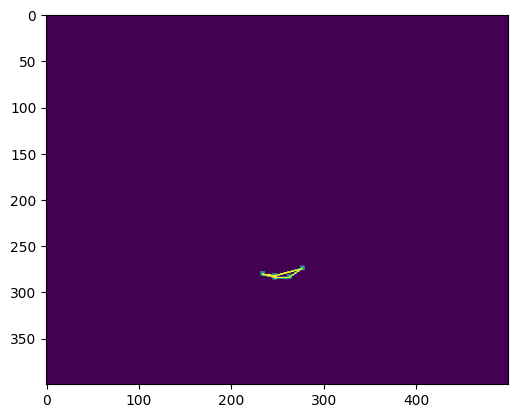

In [49]:
plt.imshow(test.world_map)